In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter
import math
from adjustText import adjust_text
from highlight_text import fig_text
import matplotlib.ticker as mtick

In [6]:
df = pd.read_csv('shotsper90.csv')
df

,Rk,Player,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,GperSh,GperSoT,Dist,FK,PK,xG,NpxG,NpxGperSh,G-xG,Np:G-xG
0,1,Max Aarons\774cf58b,DF,Norwich City,eng Premier League,21.0,2000.0,32.0,0.00,0.41,...,0.00,0.00,20.5,0.00,0.00,0.02,0.02,0.05,-0.02,-0.02
1,2,Yunis Abdelhamid\32c2d95f,DF,Reims,fr Ligue 1,33.0,1987.0,33.1,0.06,0.54,...,0.11,0.33,18.7,0.00,0.00,0.04,0.04,0.07,0.02,0.02
2,3,Salis Abdul Samed\82464ce3,MF,Clermont Foot,fr Ligue 1,21.0,2000.0,27.4,0.04,0.66,...,0.06,0.20,20.3,0.00,0.00,0.03,0.03,0.04,0.01,0.01
3,4,Laurent Abergel\31626657,MF,Lorient,fr Ligue 1,28.0,1993.0,32.8,0.00,0.91,...,0.00,0.00,22.6,0.00,0.00,0.06,0.06,0.07,-0.06,-0.06
4,5,Charles Abi\469d3d84,FW,Saint-Étienne,fr Ligue 1,21.0,2000.0,0.5,0.00,0.00,...,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi\3ee0dd59,MF,Real Sociedad,es La Liga,22.0,1999.0,28.8,0.07,0.73,...,0.10,0.20,13.7,0.00,0.00,0.07,0.07,0.09,0.00,0.00
2917,2918,Szymon Żurkowski\4e1d5e59,MF,Empoli,it Serie A,23.0,1997.0,25.6,0.23,1.84,...,0.13,0.35,18.8,0.00,0.00,0.16,0.16,0.09,0.07,0.07
2918,2919,Martin Ødegaard\79300479,MF,Arsenal,eng Premier League,22.0,1998.0,30.9,0.23,1.72,...,0.13,0.33,20.1,0.39,0.00,0.16,0.16,0.09,0.07,0.07
2919,2920,Milan Đurić\405f6586,FW,Salernitana,it Serie A,31.0,1990.0,24.1,0.21,2.07,...,0.08,0.21,10.1,0.00,0.04,0.24,0.21,0.10,-0.03,-0.04


In [40]:
df['Player'] = df['Player'].str.split('\\', expand=True)[0]
df = df[(df['90s'] > 10)]
df = df.rename(columns={'Np:G-xG': 'Performance'})

<ipython-input-40-17c1a789087b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player'] = df['Player'].str.split('\\', expand=True)[0]


In [41]:
df

,Rk,Player,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,GperSh,GperSoT,Dist,FK,PK,xG,NpxG,NpxGperSh,G-xG,Performance
0,1,Max Aarons,DF,Norwich City,eng Premier League,21.0,2000.0,32.0,0.00,0.41,...,0.00,0.00,20.5,0.00,0.00,0.02,0.02,0.05,-0.02,-0.02
1,2,Yunis Abdelhamid,DF,Reims,fr Ligue 1,33.0,1987.0,33.1,0.06,0.54,...,0.11,0.33,18.7,0.00,0.00,0.04,0.04,0.07,0.02,0.02
2,3,Salis Abdul Samed,MF,Clermont Foot,fr Ligue 1,21.0,2000.0,27.4,0.04,0.66,...,0.06,0.20,20.3,0.00,0.00,0.03,0.03,0.04,0.01,0.01
3,4,Laurent Abergel,MF,Lorient,fr Ligue 1,28.0,1993.0,32.8,0.00,0.91,...,0.00,0.00,22.6,0.00,0.00,0.06,0.06,0.07,-0.06,-0.06
7,8,Tammy Abraham,FW,Roma,it Serie A,23.0,1997.0,34.3,0.50,2.71,...,0.15,0.44,12.2,0.06,0.09,0.60,0.53,0.20,-0.10,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2916,Igor Zubeldia,DF,Real Sociedad,es La Liga,24.0,1997.0,18.3,0.00,0.49,...,0.00,0.00,17.8,0.00,0.00,0.04,0.04,0.09,-0.04,-0.04
2916,2917,Martín Zubimendi,MF,Real Sociedad,es La Liga,22.0,1999.0,28.8,0.07,0.73,...,0.10,0.20,13.7,0.00,0.00,0.07,0.07,0.09,0.00,0.00
2917,2918,Szymon Żurkowski,MF,Empoli,it Serie A,23.0,1997.0,25.6,0.23,1.84,...,0.13,0.35,18.8,0.00,0.00,0.16,0.16,0.09,0.07,0.07
2918,2919,Martin Ødegaard,MF,Arsenal,eng Premier League,22.0,1998.0,30.9,0.23,1.72,...,0.13,0.33,20.1,0.39,0.00,0.16,0.16,0.09,0.07,0.07


In [42]:
df2 = df[(df['Pos'] == 'FW') | (df['Pos'] == 'MFFW')]
df2.head(10)

,Rk,Player,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,GperSh,GperSoT,Dist,FK,PK,xG,NpxG,NpxGperSh,G-xG,Performance
7,8,Tammy Abraham,FW,Roma,it Serie A,23.0,1997.0,34.3,0.50,2.71,...,0.15,0.44,12.2,0.06,0.09,0.60,0.53,0.20,-0.10,-0.13
13,14,Che Adams,FW,Southampton,eng Premier League,25.0,1996.0,22.7,0.31,2.16,...,0.14,0.29,12.9,0.00,0.00,0.31,0.31,0.14,0.00,0.00
18,19,Yacine Adli,MFFW,Bordeaux,fr Ligue 1,21.0,2000.0,25.1,0.04,1.31,...,0.03,0.07,19.9,0.16,0.00,0.09,0.09,0.07,-0.05,-0.05
24,25,Kevin Agudelo,MFFW,Spezia,it Serie A,22.0,1998.0,13.7,0.22,1.61,...,0.14,0.27,16.6,0.00,0.00,0.18,0.18,0.11,0.04,0.04
36,37,Ludovic Ajorque,FW,Strasbourg,fr Ligue 1,27.0,1994.0,30.4,0.39,1.94,...,0.15,0.38,13.1,0.00,0.10,0.36,0.29,0.15,0.03,0.01
59,60,Iván Alejo,MFFW,Cádiz,es La Liga,26.0,1995.0,11.8,0.17,1.02,...,0.17,0.50,21.2,0.00,0.00,0.08,0.08,0.08,0.08,0.08
64,65,Mohamed Ali Cho,FW,Angers,fr Ligue 1,17.0,2004.0,20.4,0.20,2.06,...,0.10,0.27,15.5,0.00,0.00,0.34,0.34,0.17,-0.15,-0.15
67,68,Jim Allevinah,FW,Clermont Foot,fr Ligue 1,26.0,1995.0,16.5,0.06,2.55,...,0.02,0.07,18.7,0.06,0.00,0.21,0.21,0.08,-0.15,-0.15
70,71,Miguel Almirón,MFFW,Newcastle Utd,eng Premier League,27.0,1994.0,19.1,0.05,1.68,...,0.03,0.14,18.7,0.00,0.00,0.11,0.11,0.06,-0.06,-0.06
90,91,Felipe Anderson,FW,Lazio,it Serie A,28.0,1993.0,32.1,0.19,1.37,...,0.14,0.38,15.8,0.00,0.00,0.17,0.17,0.13,0.02,0.02


In [43]:
df3 = df2[['Player','Pos','90s','Gls','NpxGperSh','Performance', 'Squad']].copy()
df3.head(10)

,Player,Pos,90s,Gls,NpxGperSh,Performance,Squad
7,Tammy Abraham,FW,34.3,0.50,0.20,-0.13,Roma
13,Che Adams,FW,22.7,0.31,0.14,0.00,Southampton
18,Yacine Adli,MFFW,25.1,0.04,0.07,-0.05,Bordeaux
24,Kevin Agudelo,MFFW,13.7,0.22,0.11,0.04,Spezia
36,Ludovic Ajorque,FW,30.4,0.39,0.15,0.01,Strasbourg
59,Iván Alejo,MFFW,11.8,0.17,0.08,0.08,Cádiz
64,Mohamed Ali Cho,FW,20.4,0.20,0.17,-0.15,Angers
67,Jim Allevinah,FW,16.5,0.06,0.08,-0.15,Clermont Foot
70,Miguel Almirón,MFFW,19.1,0.05,0.06,-0.06,Newcastle Utd
90,Felipe Anderson,FW,32.1,0.19,0.13,0.02,Lazio


In [44]:
df4 = df3.loc[df3['Squad'] == "Manchester City"]
df5 = df3.loc[df3['Squad'] != "Manchester City"]
df4.head(10)

,Player,Pos,90s,Gls,NpxGperSh,Performance,Squad
899,Phil Foden,FW,23.6,0.38,0.16,0.00,Manchester City
1058,Jack Grealish,FW,21.3,0.14,0.11,-0.08,Manchester City
1280,Gabriel Jesus,FW,20.9,0.38,0.15,-0.11,Manchester City
1607,Riyad Mahrez,FW,16.6,0.66,0.11,0.04,Manchester City
2482,Bernardo Silva,MFFW,31.7,0.25,0.14,0.04,Manchester City
2565,Raheem Sterling,FW,23.6,0.55,0.22,-0.04,Manchester City


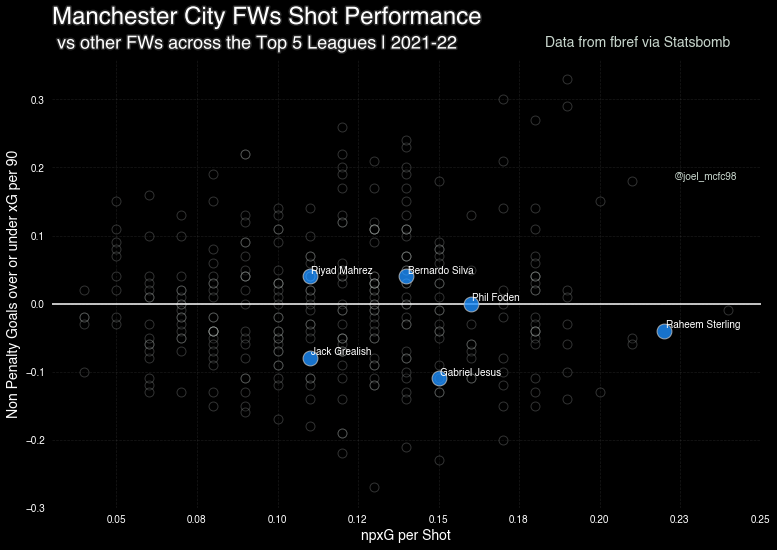

In [64]:
with plt.style.context("dark_background"):
    line_color = "silver"
    marker_color = "dodgerblue"
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)  
        ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    ax.scatter( df4["NpxGperSh"],df4["Performance"], s=220, zorder=10, 
                           ec=line_color, fc=marker_color, alpha=0.8) ##scatter points

    ax.scatter( df5["NpxGperSh"],df5["Performance"],
                            zorder = 2,fc='black', ec='mintcream', s = 80, alpha = .2) ##scatter points
    
    texts = [] ##plot player names
    for row in df4.itertuples():
        if row.Squad == 'Manchester City':
            texts.append(ax.text( row.NpxGperSh	, row.Performance, row.Player, fontsize=10, ha='center', fontweight='bold',  va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
   
    ax.set(xlabel="npxG per Shot", ylabel="Non Penalty Goals over or under xG per 90", xlim=(0.03, 0.25)) ## set labels and limits

    ax.axhline()
#     x = np.array(df5.NpxGperSh)
#     y = np.array(df5.Performance)
#     y_avg = [np.mean(x)] * len(x)
#     ax.plot(x, y_avg, color='white',  ls='--', label="average plot")

    plt.tick_params(left = False, bottom = False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels

    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes

    
    fig_text(s=f'Data from fbref via Statsbomb',
        x=.65, y =.9, fontsize=14,color='#c7d5cc')

    fig.text(.8,.65,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')
    
    fig.text(x=0.08, y=0.92, s="Manchester City FWs Shot Performance", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s=' vs other FWs across the Top 5 Leagues | 2021-22',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("mancity-shot-performance", dpi=180)   

In [53]:
df6 = df[(df['Pos'] == 'MF') | (df['Pos'] == 'MFFW')]
df6.head(10)

,Rk,Player,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,GperSh,GperSoT,Dist,FK,PK,xG,NpxG,NpxGperSh,G-xG,Performance
2,3,Salis Abdul Samed,MF,Clermont Foot,fr Ligue 1,21.0,2000.0,27.4,0.04,0.66,...,0.06,0.20,20.3,0.00,0.0,0.03,0.03,0.04,0.01,0.01
3,4,Laurent Abergel,MF,Lorient,fr Ligue 1,28.0,1993.0,32.8,0.00,0.91,...,0.00,0.00,22.6,0.00,0.0,0.06,0.06,0.07,-0.06,-0.06
14,15,Tyler Adams,MF,RB Leipzig,de Bundesliga,22.0,1999.0,15.0,0.00,0.13,...,0.00,NaN,19.4,0.00,0.0,0.01,0.01,0.08,-0.01,-0.01
18,19,Yacine Adli,MFFW,Bordeaux,fr Ligue 1,21.0,2000.0,25.1,0.04,1.31,...,0.03,0.07,19.9,0.16,0.0,0.09,0.09,0.07,-0.05,-0.05
23,24,Lucien Agoume,MF,Brest,fr Ligue 1,19.0,2002.0,20.8,0.00,0.77,...,0.00,0.00,10.8,0.00,0.0,0.05,0.05,0.07,-0.05,-0.05
24,25,Kevin Agudelo,MFFW,Spezia,it Serie A,22.0,1998.0,13.7,0.22,1.61,...,0.14,0.27,16.6,0.00,0.0,0.18,0.18,0.11,0.04,0.04
31,32,Jean-Eudes Aholou,MF,Strasbourg,fr Ligue 1,27.0,1994.0,11.2,0.09,1.52,...,0.06,0.50,20.2,0.00,0.0,0.14,0.14,0.09,-0.05,-0.05
48,49,Tomás Alarcón,MF,Cádiz,es La Liga,22.0,1999.0,15.8,0.00,0.95,...,0.00,0.00,24.6,0.00,0.0,0.06,0.06,0.07,-0.06,-0.06
52,53,Luis Alberto,MF,Lazio,it Serie A,28.0,1992.0,26.1,0.19,1.80,...,0.11,0.31,19.8,0.04,0.0,0.13,0.13,0.08,0.06,0.06
56,57,Thiago Alcántara,MF,Liverpool,eng Premier League,30.0,1991.0,17.0,0.06,1.47,...,0.04,0.17,18.2,0.00,0.0,0.11,0.11,0.08,-0.05,-0.05


In [57]:
df7 = df6.loc[df6['Squad'] == "Manchester City"]
df8 = df6.loc[df6['Squad'] != "Manchester City"]
df8.head(10)

,Rk,Player,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,GperSh,GperSoT,Dist,FK,PK,xG,NpxG,NpxGperSh,G-xG,Performance
2,3,Salis Abdul Samed,MF,Clermont Foot,fr Ligue 1,21.0,2000.0,27.4,0.04,0.66,...,0.06,0.20,20.3,0.00,0.0,0.03,0.03,0.04,0.01,0.01
3,4,Laurent Abergel,MF,Lorient,fr Ligue 1,28.0,1993.0,32.8,0.00,0.91,...,0.00,0.00,22.6,0.00,0.0,0.06,0.06,0.07,-0.06,-0.06
14,15,Tyler Adams,MF,RB Leipzig,de Bundesliga,22.0,1999.0,15.0,0.00,0.13,...,0.00,NaN,19.4,0.00,0.0,0.01,0.01,0.08,-0.01,-0.01
18,19,Yacine Adli,MFFW,Bordeaux,fr Ligue 1,21.0,2000.0,25.1,0.04,1.31,...,0.03,0.07,19.9,0.16,0.0,0.09,0.09,0.07,-0.05,-0.05
23,24,Lucien Agoume,MF,Brest,fr Ligue 1,19.0,2002.0,20.8,0.00,0.77,...,0.00,0.00,10.8,0.00,0.0,0.05,0.05,0.07,-0.05,-0.05
24,25,Kevin Agudelo,MFFW,Spezia,it Serie A,22.0,1998.0,13.7,0.22,1.61,...,0.14,0.27,16.6,0.00,0.0,0.18,0.18,0.11,0.04,0.04
31,32,Jean-Eudes Aholou,MF,Strasbourg,fr Ligue 1,27.0,1994.0,11.2,0.09,1.52,...,0.06,0.50,20.2,0.00,0.0,0.14,0.14,0.09,-0.05,-0.05
48,49,Tomás Alarcón,MF,Cádiz,es La Liga,22.0,1999.0,15.8,0.00,0.95,...,0.00,0.00,24.6,0.00,0.0,0.06,0.06,0.07,-0.06,-0.06
52,53,Luis Alberto,MF,Lazio,it Serie A,28.0,1992.0,26.1,0.19,1.80,...,0.11,0.31,19.8,0.04,0.0,0.13,0.13,0.08,0.06,0.06
56,57,Thiago Alcántara,MF,Liverpool,eng Premier League,30.0,1991.0,17.0,0.06,1.47,...,0.04,0.17,18.2,0.00,0.0,0.11,0.11,0.08,-0.05,-0.05


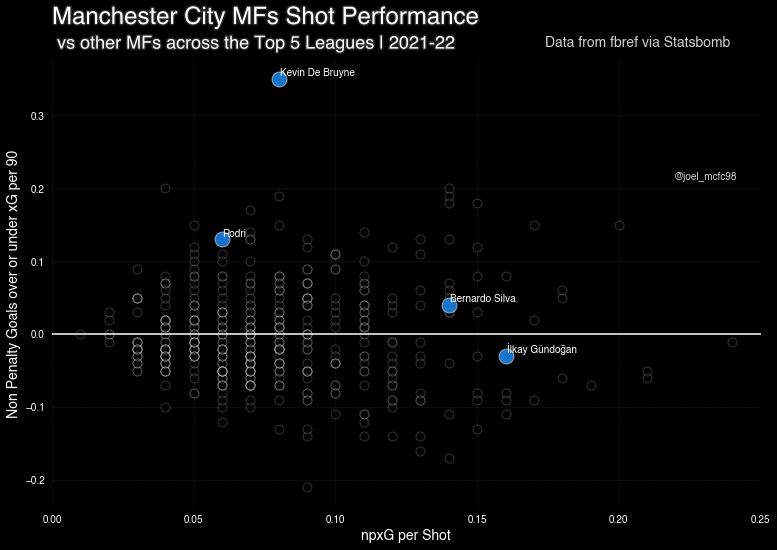

In [63]:
with plt.style.context("dark_background"):
    line_color = "silver"
    marker_color = "dodgerblue"
    plt.rcParams['font.family'] = 'Helvetica' ##set global font
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.grid(linestyle="dashed", lw=0.7, alpha=0.1, zorder=1) ## a faint grid
    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)  
        ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes
    
    
    ax.scatter( df7["NpxGperSh"],df7["Performance"], s=220, zorder=10, 
                           ec=line_color, fc=marker_color, alpha=0.8) ##scatter points

    ax.scatter( df8["NpxGperSh"],df8["Performance"],
                            zorder = 2,fc='black', ec='mintcream', s = 80, alpha = .2) ##scatter points
    
    texts = [] ##plot player names
    for row in df7.itertuples():
        if row.Squad == 'Manchester City':
            texts.append(ax.text( row.NpxGperSh	, row.Performance, row.Player, fontsize=10, ha='center', fontweight='bold',  va='center', zorder=10))
    adjust_text(texts) ## to remove overlaps between labels
   
    ax.set(xlabel="npxG per Shot", ylabel="Non Penalty Goals over or under xG per 90", xlim=(0, 0.25)) ## set labels and limits

    ax.axhline()
#     x = np.array(df8.NpxGperSh)
#     y = np.array(df8.Performance)
#     y_avg = [np.mean(x)] * len(x)
#     ax.plot(x, y_avg, color='white',  ls='--', label="average plot")

    plt.tick_params(left = False, bottom = False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    ax.xaxis.label.set(fontsize=14, fontweight='bold')
    ax.yaxis.label.set(fontsize=14, fontweight='bold') ## increase the weight of the axis labels

    ax.set_position([0.08, 0.08, 0.82, 0.78]) ## make space for the title on top of the axes

    
    fig_text(s=f'Data from fbref via Statsbomb',
        x=.65, y =.9, fontsize=14,color='#c7d5cc')

    fig.text(.8,.65,f'@joel_mcfc98', fontstyle='italic',fontsize=10,color='#c7d5cc')
    
    fig.text(x=0.08, y=0.92, s="Manchester City MFs Shot Performance", 
            ha='left', fontsize=24, fontweight='bold', 
            path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])   
    
    fig_text(x=0.08, y=0.90, ha='left',
             fontsize=18, fontweight='bold',
             s=' vs other MFs across the Top 5 Leagues | 2021-22',
             path_effects=[pe.Stroke(linewidth=3, foreground='0.15'),
                       pe.Normal()])

fig.savefig("mancity-shot-performance-mids", dpi=180)   